# Plotting SWOT outputs (from simulation in NATL60) 

## Imports

In [4]:
# no warnings in outputs
import warnings
warnings.filterwarnings('ignore')

# import libraries
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr # xarray missing !!!!
import cartopy.crs as ccrs # cartopy missing !!!!
import cartopy.feature as cfeature

# imports to formate grid label
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# import beautiful colormaps for o
import cmocean # cmocean missing !!!!



%matplotlib inline
 

## Load files

In [10]:
# --- Read SSH fields --- #
# set path and directories
pathdata = '/Users/sammymetref/Documents/Boost-Swot/Notebooks/GitHub/Personal_Files/2018/Data/'
 

nmonths=16   
timesh1=[]
ilabel=[]
ilabelname=[]
itime=0
for imonths in range(nmonths):
    # filename
    if imonths+6<13:
        filename1 = 'NATL60-CJM165_y2012m'+np.str('{:02d}'.format(imonths+6))+'.1d.SSH.nc' # SSH field
    else: 
        filename1 = 'NATL60-CJM165_y2013m'+np.str('{:02d}'.format(imonths+6-12))+'.1d.SSH.nc' # SSH field
    
    ''.join([pathdata, filename1])

    # read file with xarray
    ds1 = xr.open_dataset(''.join([pathdata, filename1])) 

    # load variables
    lon1 = ds1['nav_lon'][:,:] 
    lat1 = ds1['nav_lat'][:,:] 
    ndays=np.shape(ds1['sossheig'])[0] 
    for idays in range(0,ndays): 
        ssh1 = ds1['sossheig'][idays,:,:] 
        timesh1=np.append(timesh1,np.mean(np.mean(ssh1)))  
        if idays==1 and imonths==0 or idays==15 and imonths!=0 :
            ilabel=np.append(ilabel,itime)
            if imonths+6<13:
                ilabelname=np.append(ilabelname,np.str('{:02d}'.format(imonths+6))+'/12')
            else: 
                ilabelname=np.append(ilabelname,np.str('{:02d}'.format(imonths+6-12))+'/13')
        itime=itime+1
         

# Visualization

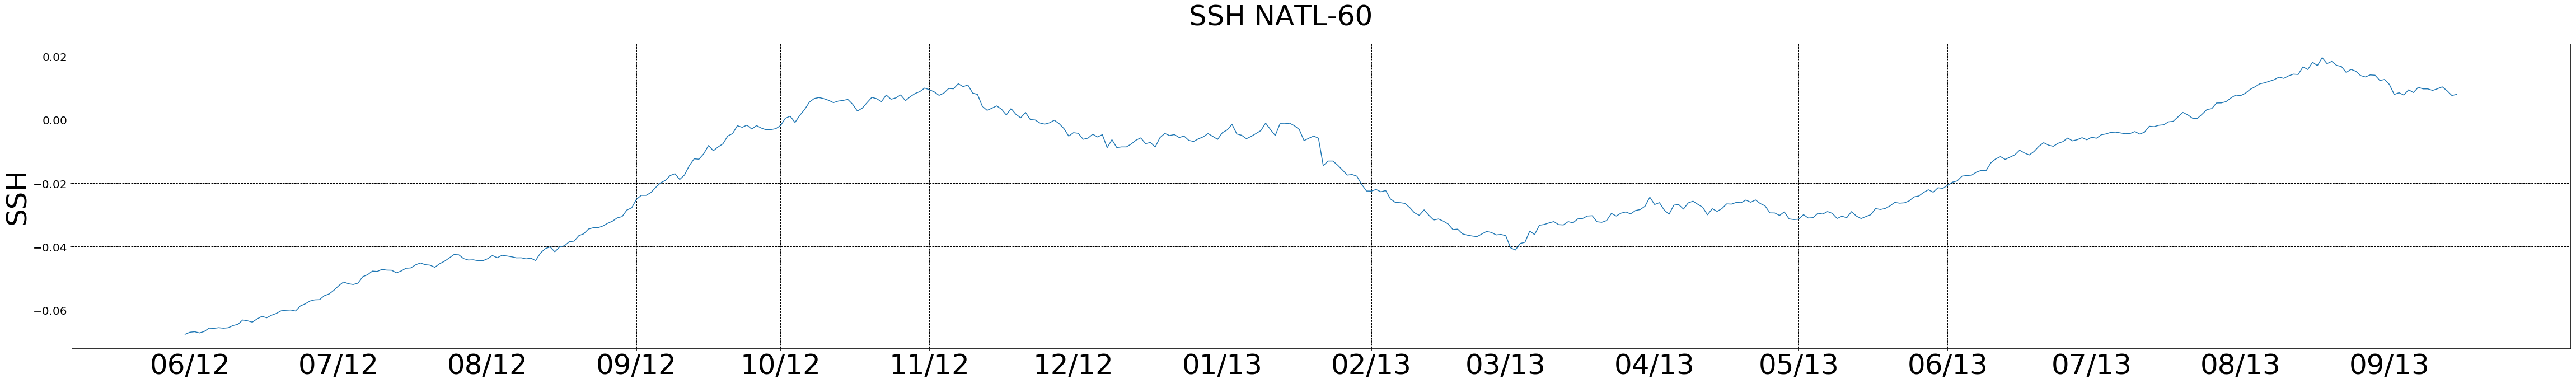

In [11]:
# size of the figure
fig = plt.figure(figsize=(80,10))
ax = fig.add_subplot(111)

plt.rc('ytick', labelsize=20) 

# figure title
fig.suptitle("SSH NATL-60", fontsize=50) 
# SSH
plt.plot(timesh1)
plt.axis('tight'); 
plt.ylabel('SSH',fontsize=50);  
ax.set_xticks(ilabel);
ax.set_xticklabels(ilabelname,fontsize=50);
ax.grid(color='k', linestyle='--', linewidth=1)

# Here is the test 